In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')


0.13.0


In [35]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

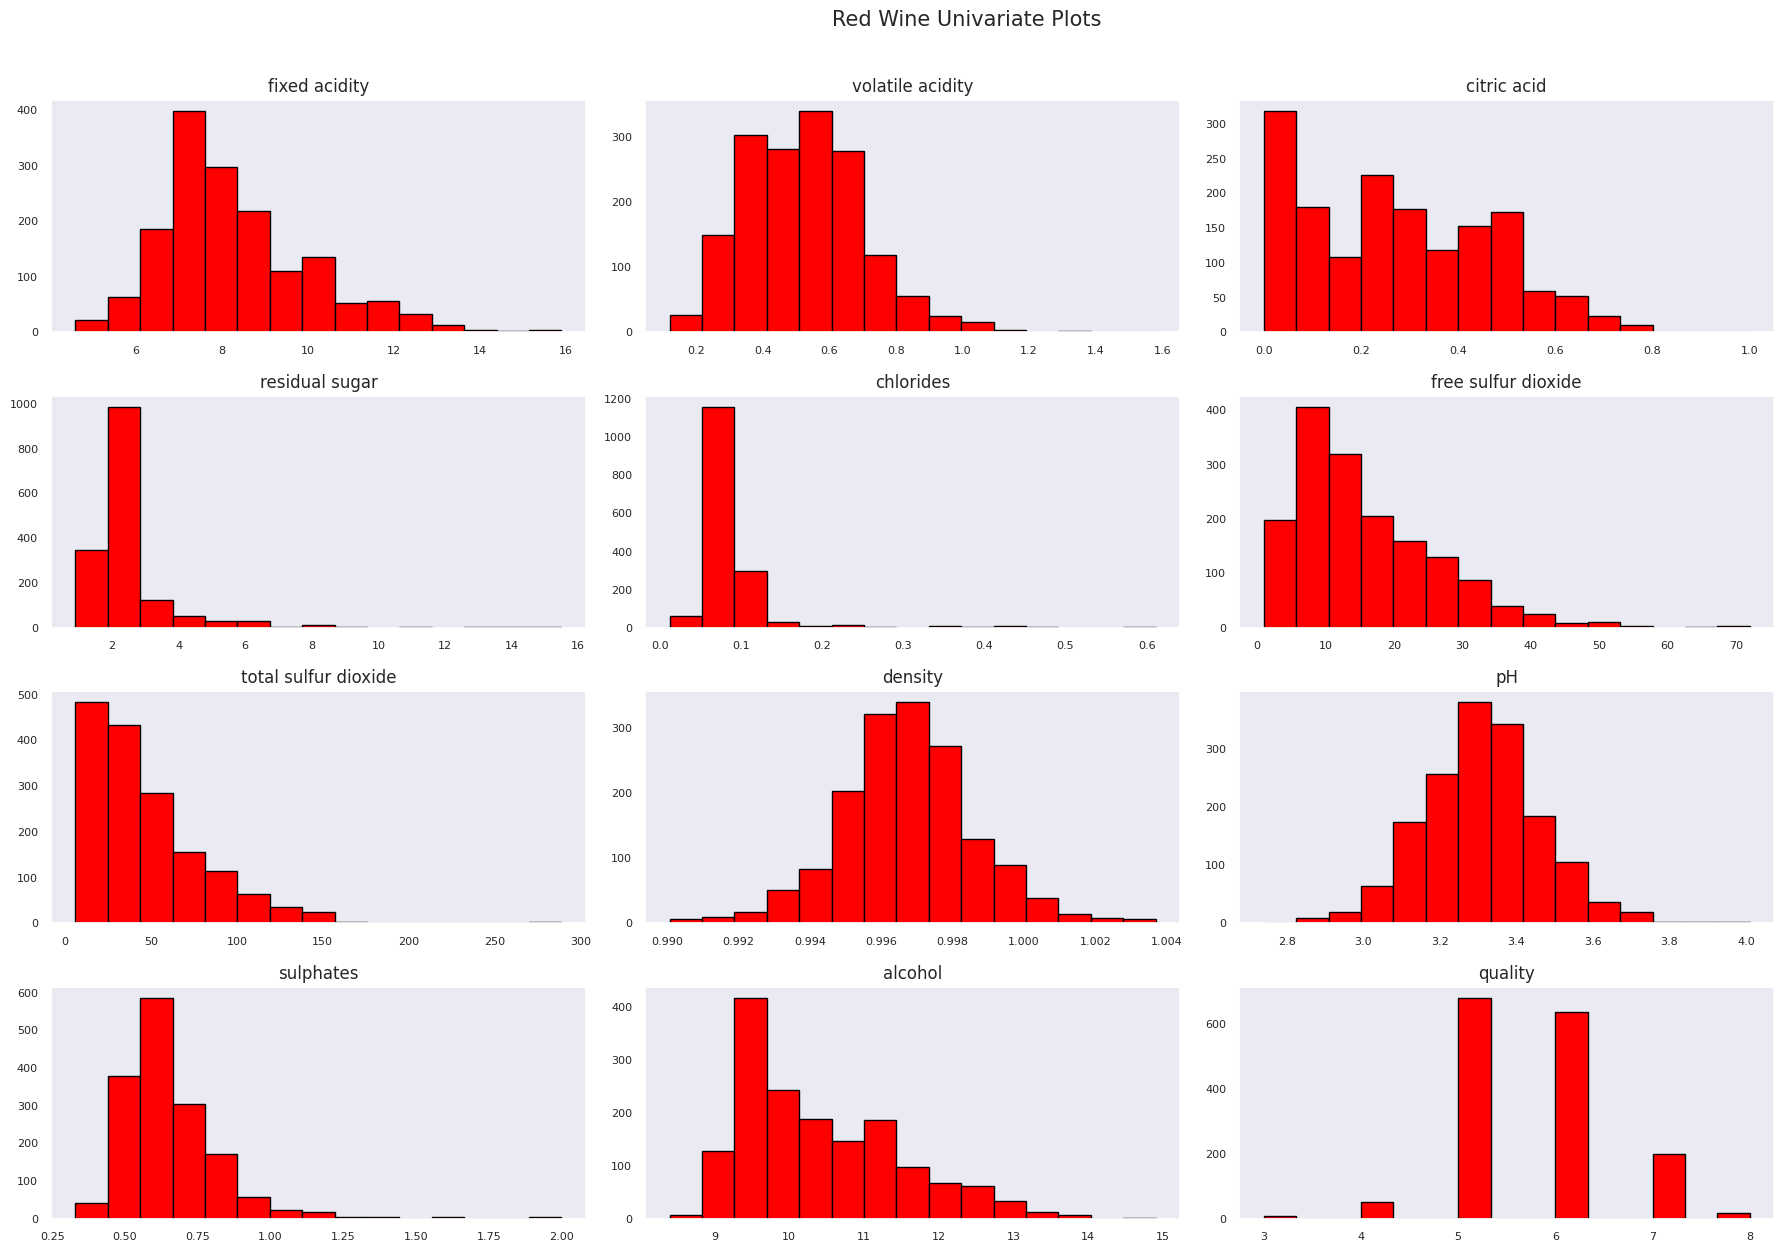

In [36]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

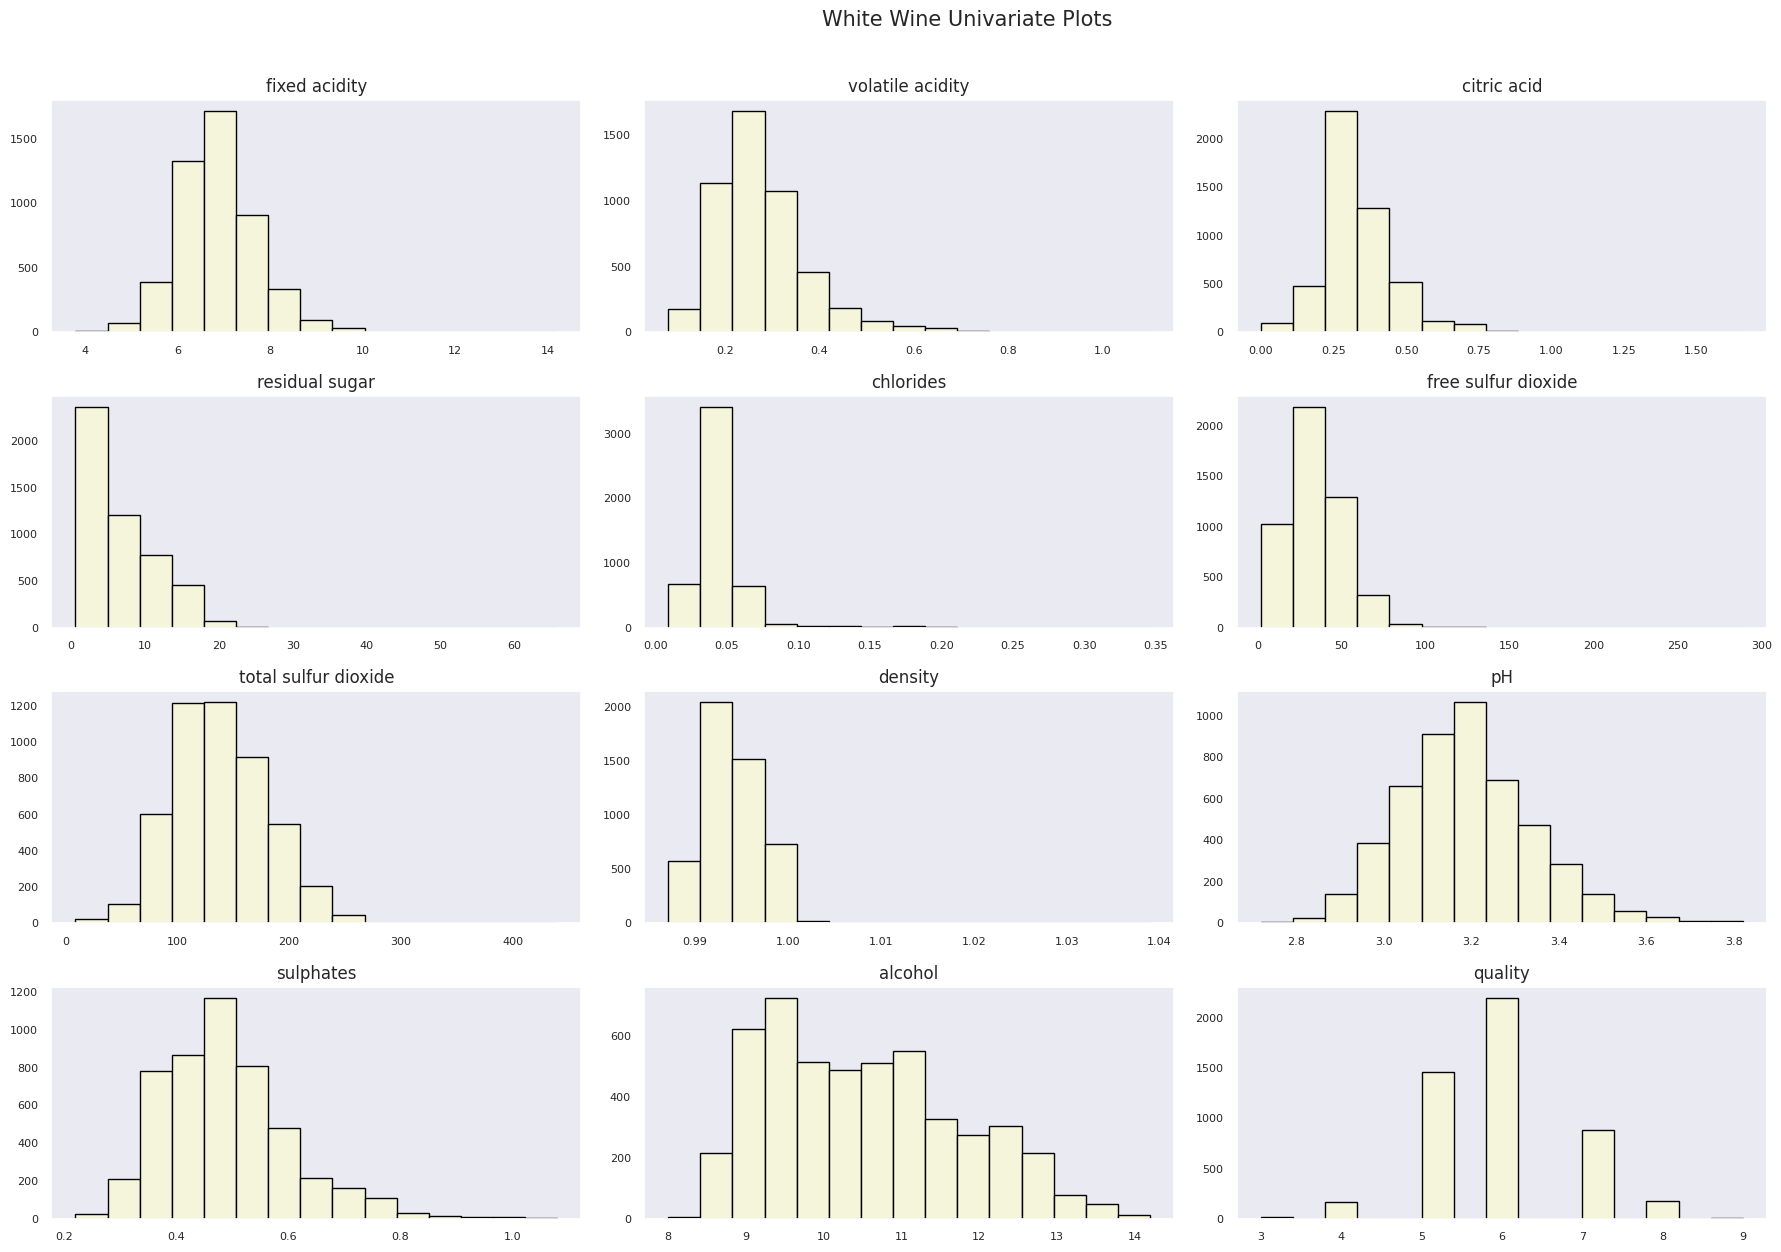

In [37]:
white_wine.hist(bins=15, color='beige', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

<Axes: xlabel='quality_label'>

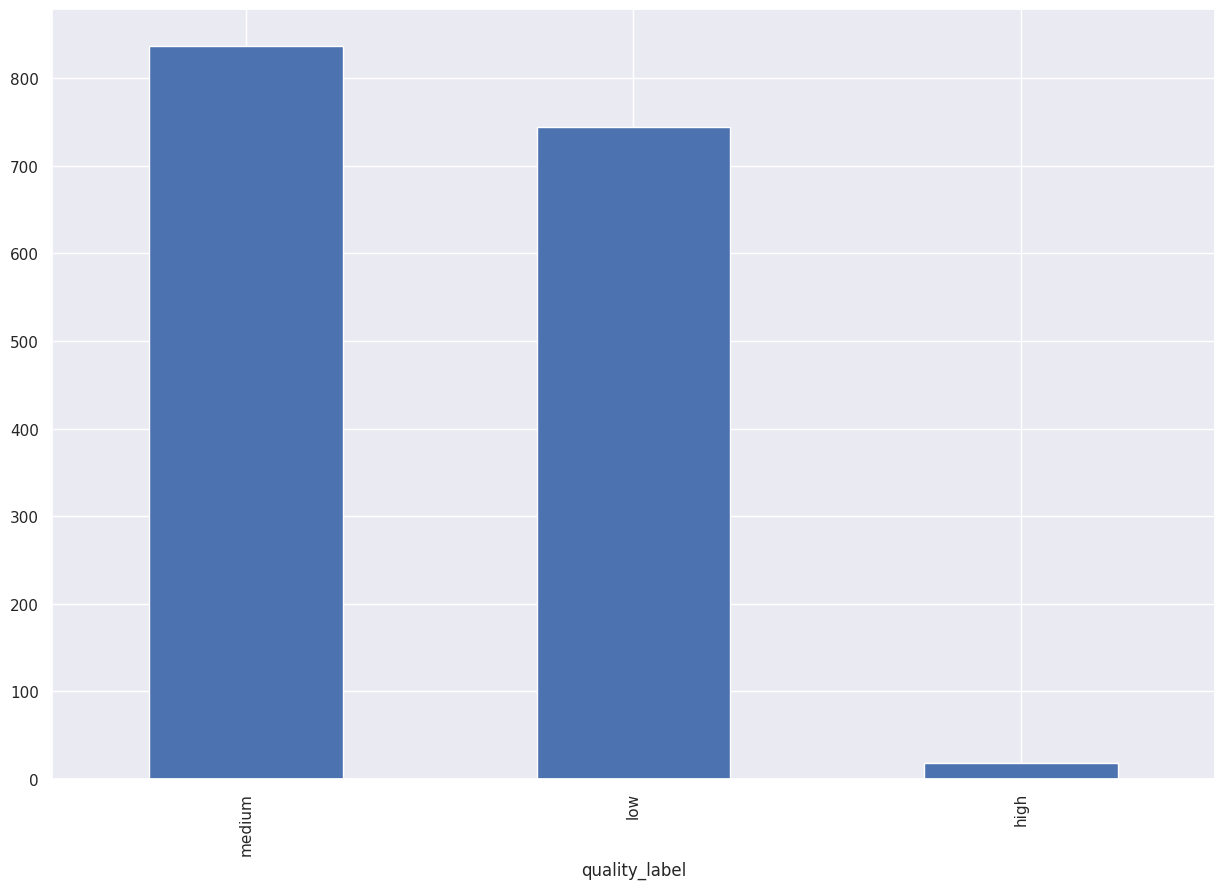

In [38]:
red_wine['quality_label'].value_counts().head(10).plot.bar()
#why head(10)?

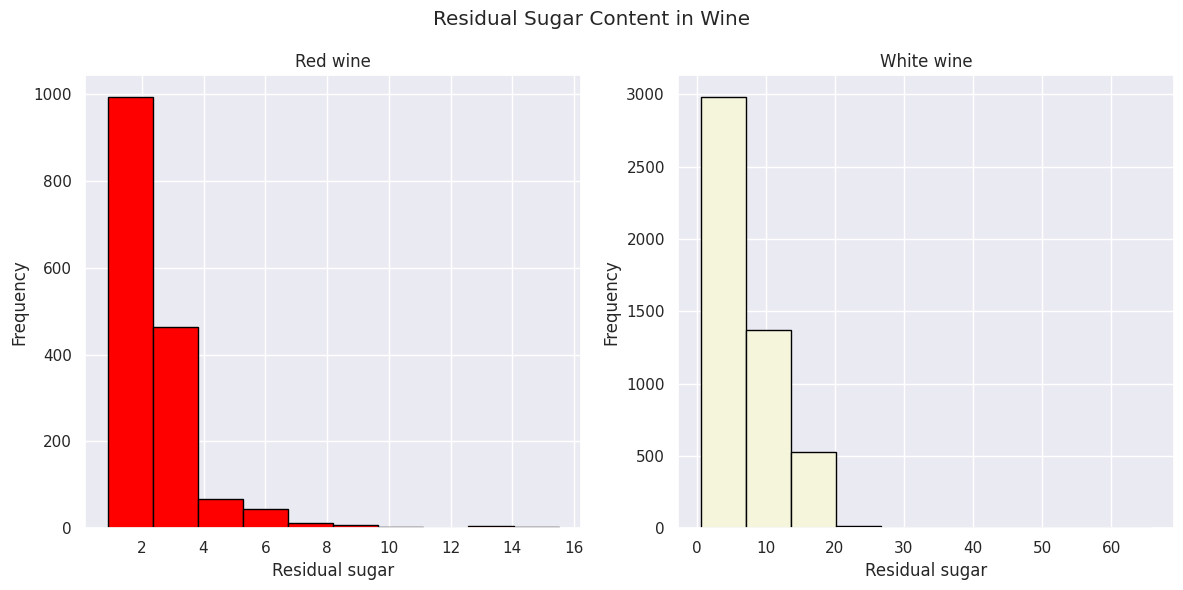

In [39]:
plt.suptitle('Residual Sugar Content in Wine')


plt.subplot(121)  # Subplot 1 (left)
res1 = red_wine['residual sugar'].plot.hist(color='red', edgecolor='black', x='residual sugar', figsize=(12,6) ,title='Red wine' )
res1.set_xlabel("Residual sugar")


plt.subplot(122)  # Subplot 2 (right)
res2 = white_wine['residual sugar'].plot.hist(color='beige',edgecolor='black', title='White wine' )
res2.set_xlabel("Residual sugar")




plt.tight_layout()  # Ensure the plots don't overlap
plt.show()

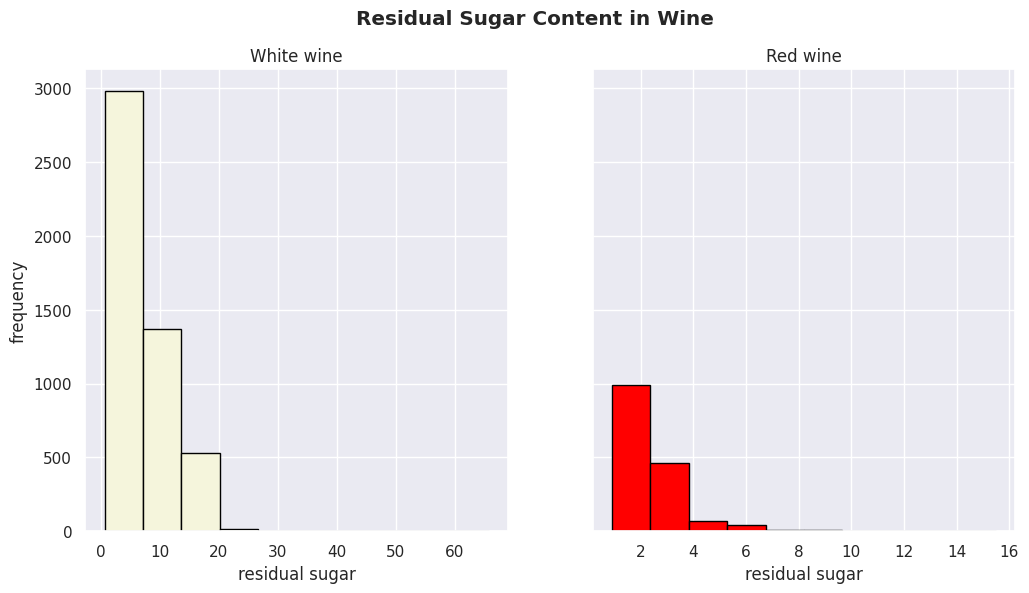

In [40]:


fig, ax = plt.subplots(1,2,figsize=(12,6), sharey=True) 
plt.suptitle('Residual Sugar Content in Wine', fontweight ='bold')



ax[0].hist(white_wine['residual sugar'], color='beige',edgecolor='black')
ax[0].set_title('White wine')
ax[0].set_xlabel('residual sugar') 
ax[0].set_ylabel('frequency') 


ax[1].hist(red_wine['residual sugar'], color='red', edgecolor='black' )
ax[1].set_title('Red wine')
ax[1].set_xlabel('residual sugar') 



plt.show()



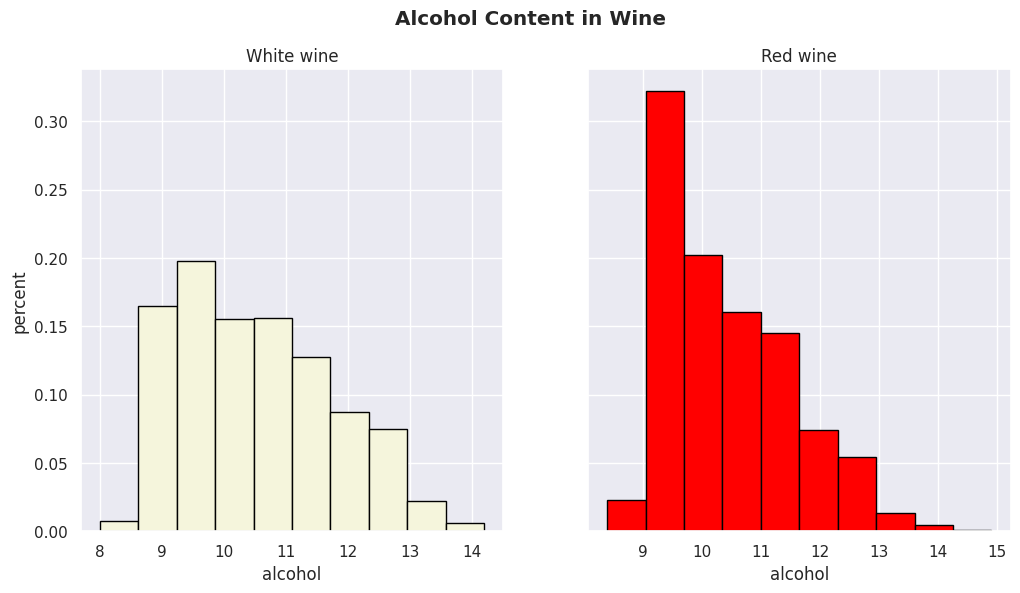

In [41]:

fig, ax = plt.subplots(1,2,figsize=(12,6), sharey=True) 
plt.suptitle('Alcohol Content in Wine', fontweight ='bold')



ax[0].hist(white_wine['alcohol'],weights=np.ones(len(white_wine['alcohol']))/len(white_wine['alcohol']) ,color='beige',edgecolor='black')
ax[0].set_title('White wine')
ax[0].set_xlabel('alcohol') 
ax[0].set_ylabel('percent') 


ax[1].hist(red_wine['alcohol'],weights=np.ones(len(red_wine['alcohol']))/len(red_wine['alcohol']), color='red', edgecolor='black' )
ax[1].set_title('Red wine')
ax[1].set_xlabel('alcohol') 



plt.show()

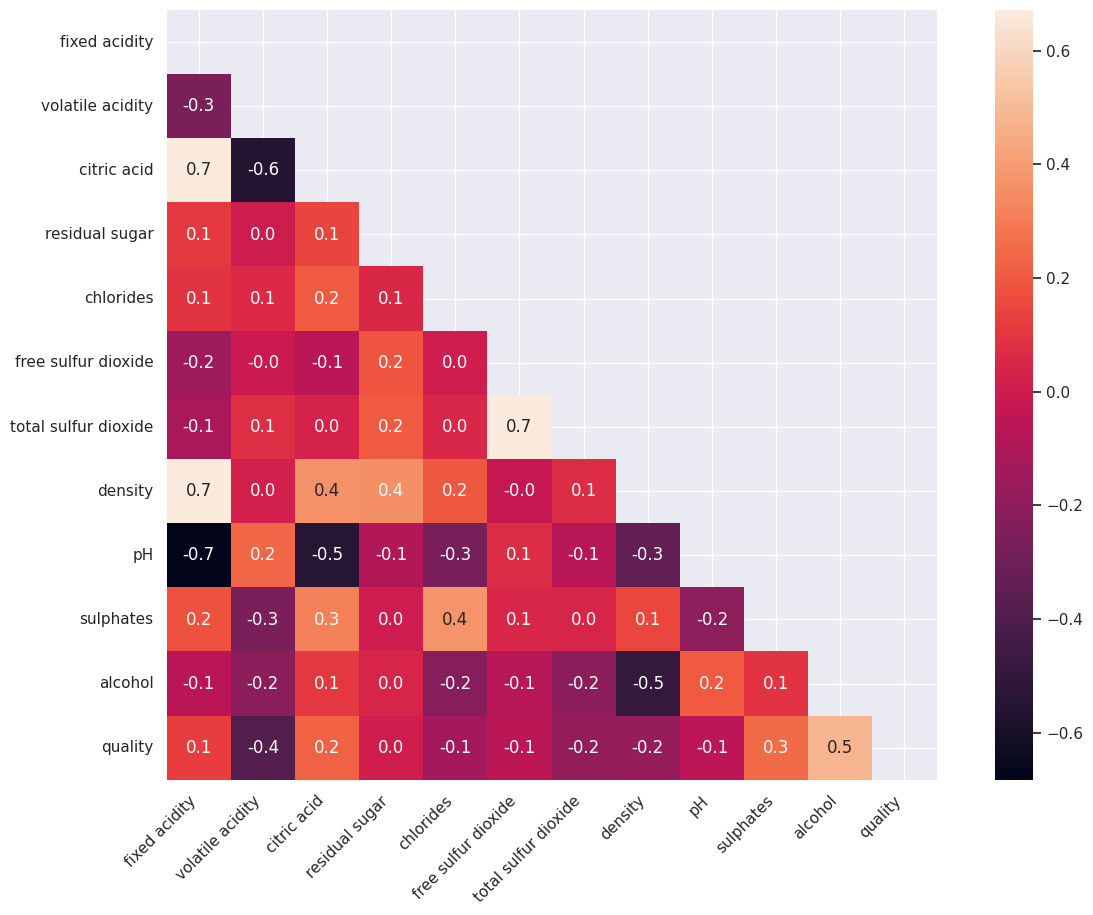

In [49]:
if 'quality_label' in red_wine:
    red_wine_num=red_wine.drop(labels='quality_label', axis=1)
    
# creating mask
mask = np.triu(np.ones_like(red_wine_num.corr()))

ax=sns.heatmap(
    red_wine_num.corr(), 
    annot=True,fmt=".1f",
    square=True,
    mask=mask 
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc = {'figure.figsize':(15,10)})

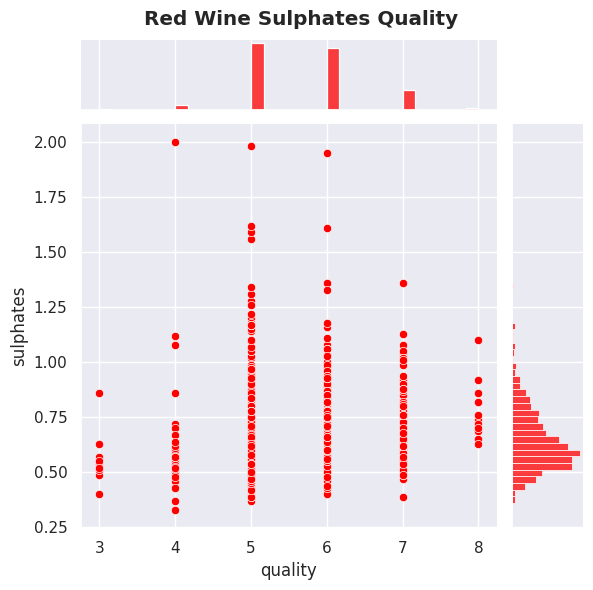

In [ ]:
sns.jointplot(data=red_wine, x="quality", y="sulphates", color='red')
plt.suptitle('Red Wine Sulphates Quality', fontweight ='bold')
plt.subplots_adjust(top=0.93)




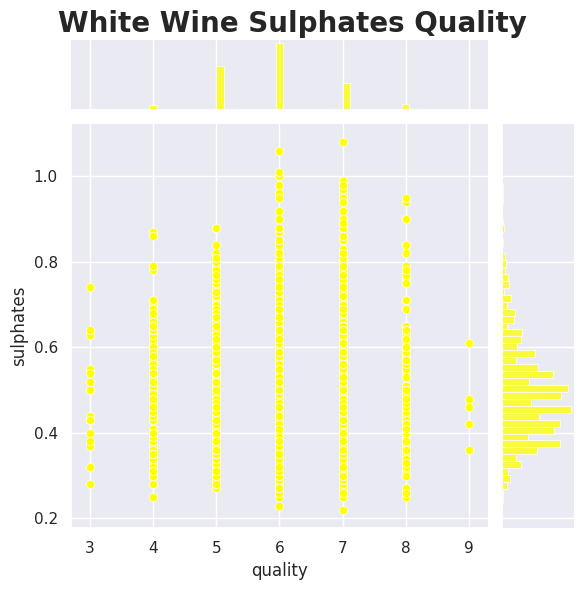

In [ ]:
sns.jointplot(data=white_wine, x="quality", y="sulphates", color='yellow')
plt.suptitle('White Wine Sulphates Quality', fontweight ='bold', fontsize='20')
plt.subplots_adjust(top=0.93)

Text(0.5, 1.0, 'Red Wine Sulphates Alcohol and Quality')

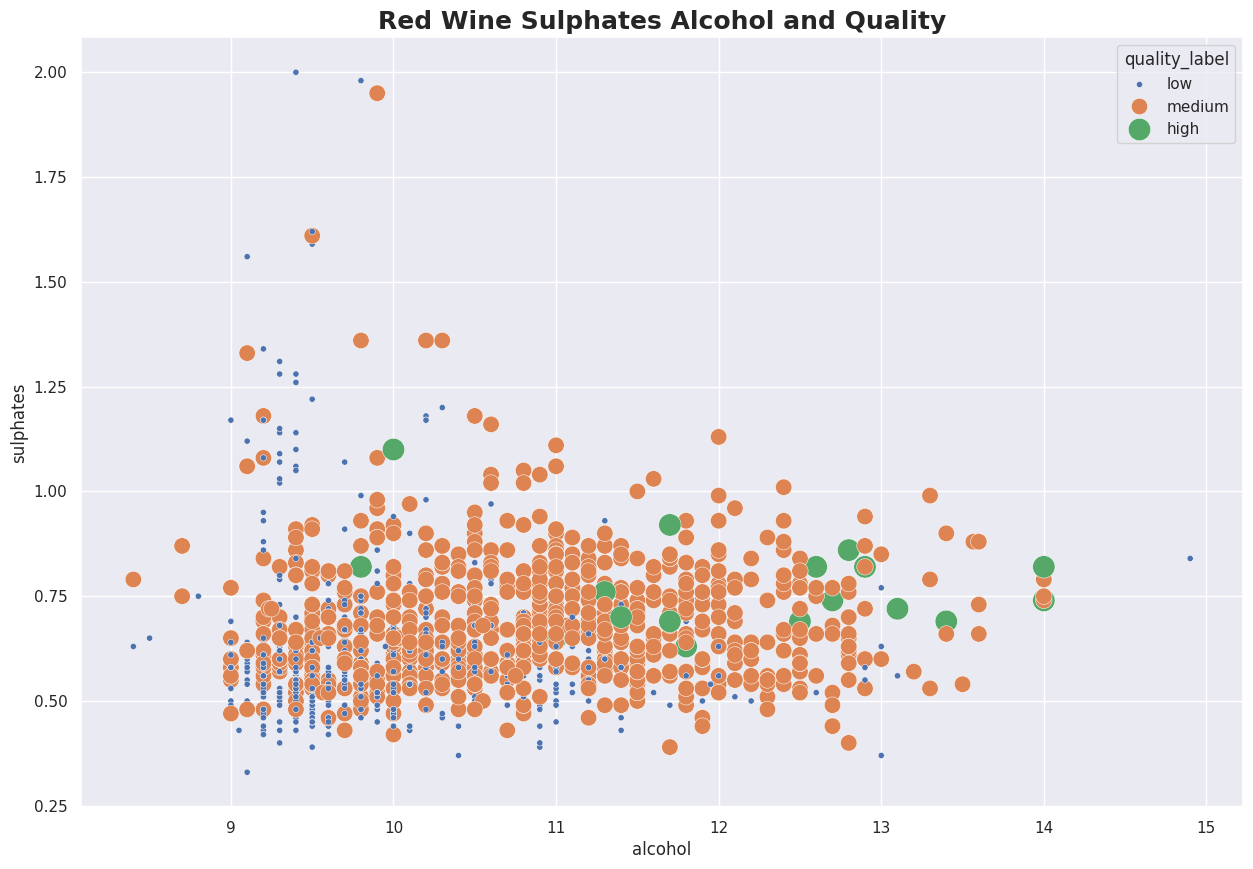

In [ ]:
sns.scatterplot(data=red_wine, x="alcohol", y="sulphates", hue="quality_label", size="quality_label", size_order=("high", "medium", "low"), sizes=(20,260))
plt.title('Red Wine Sulphates Alcohol and Quality', fontweight ='bold', fontsize='18')


Text(0.5, 1.0, 'White Wine Sulphates Alcohol and Quality')

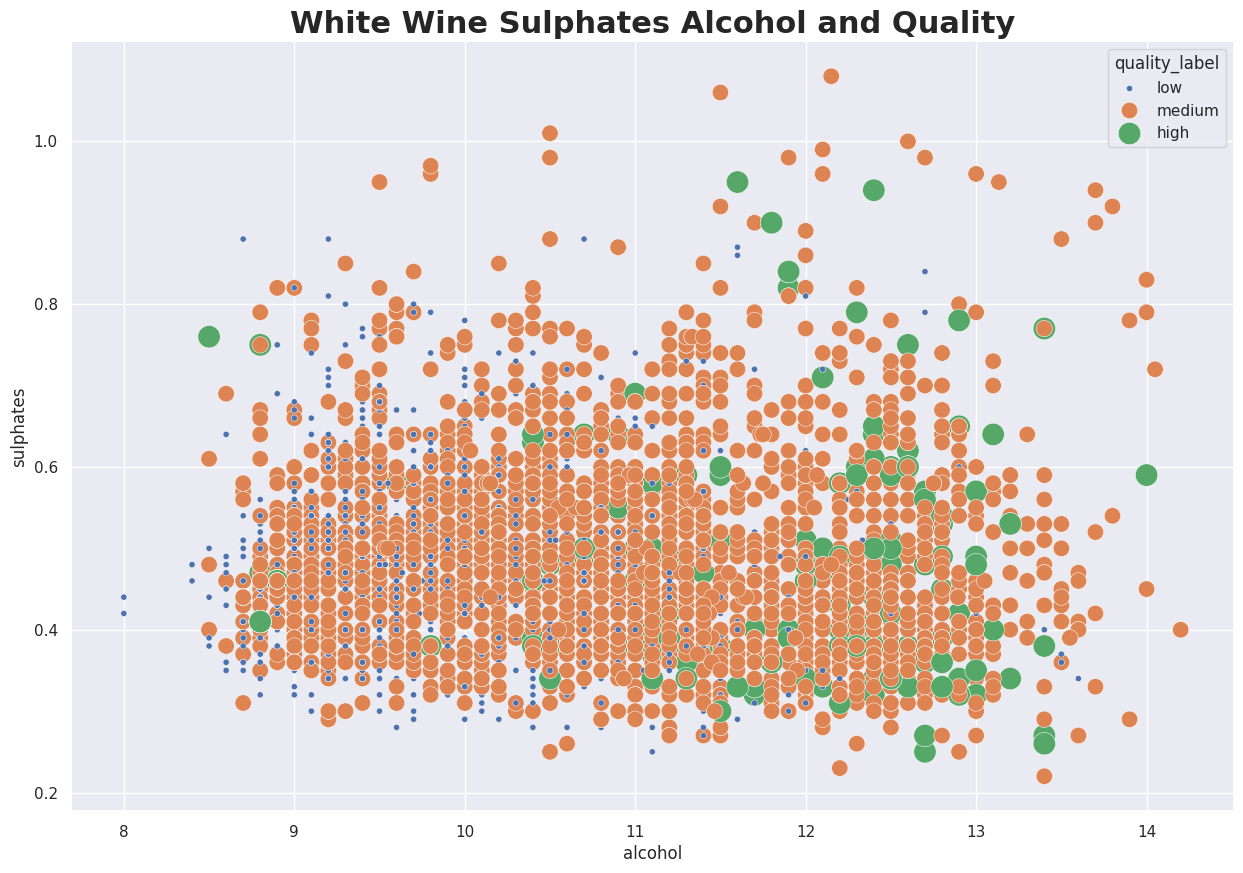

In [ ]:
sns.scatterplot(data=white_wine, x="alcohol", y="sulphates", hue="quality_label", size="quality_label", size_order=("high", "medium", "low"), sizes=(20,260))
plt.title('White Wine Sulphates Alcohol and Quality', fontweight ='bold', fontsize='22')
